In [1]:
include("UndrivenHelium.jl")
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, legend = :false, size=(600,600), color=:black, markersize = 0.3 )
const Z = 2.0
const order = 20
const t0 = 0.0
const t_max = 0.5 
const abs_tol = 1.0E-20
const steps = 500_000;

In [2]:
include("Integ.jl")

taylorintegps (generic function with 1 method)

In [3]:
#Initial conditions
c1 = condini2D(5.8007, 0.0, 0.0, 0.0, 0.0)

8-element Array{Float64,1}:
 2.40846
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 4.0    
 0.0    

In [4]:
@time tvS, xvS, δSv, mv = vartaylorinteg(undrivenHelium2D!, c1, 0.0, 30.0, 25, 1e-20, maxsteps=3_000);  

 25.273853 seconds (340.75 M allocations: 23.650 GiB, 26.67% gc time)


In [5]:
norm(δSv,Inf)

3.9909832570940015e-11


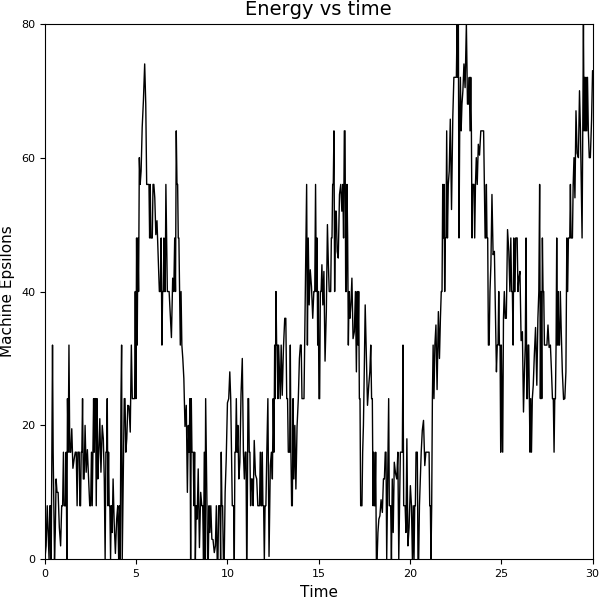

In [6]:
ene1 = Float64[abs(regHam2D(xvS[j, :]))/eps() for j in eachindex(tvS)];
plot(tvS, ene1, title ="Energy vs time")
xaxis!("Time")
yaxis!("Machine Epsilons")


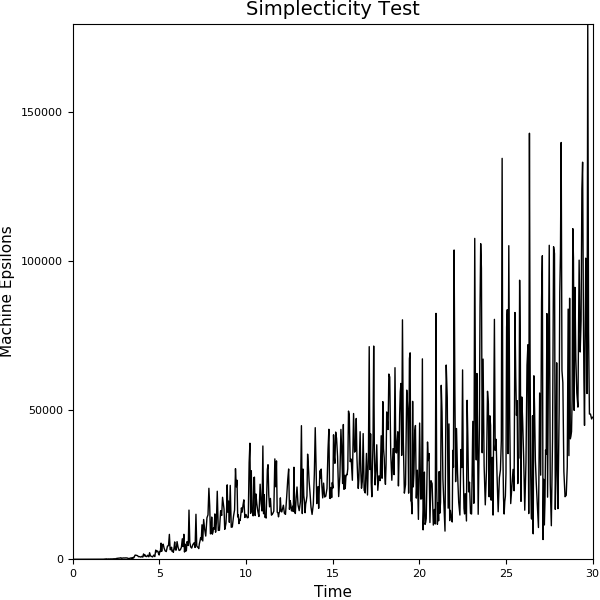

In [7]:
plot(tvS, δSv/eps(), title ="Simplecticity Test")
xaxis!("Time")
yaxis!("Machine Epsilons")